# Algoritmo de Regressão Polinomial - LinearRegression e PolynomialFeatures

## Link para o notebook principal

[Ir para main.ipynb](./main.ipynb)

## Índice

- [Modelos Utilizados](#modelos-utilizados)
- [Importando Pacotes e Bibliotecas](#importando-os-pacotes-e-bibliotecas)
- [Importando os Datasets](#importando-os-datasets)


## Importando os pacotes e bibliotecas

In [103]:
# biblioteca para realizar o corte teste | treino
from sklearn.model_selection import train_test_split

# bibliotecas para a regressao
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

## Impressao de Graficos
from matplotlib import pyplot as plt
import seaborn as sns

## Bibliotecas Base
import pandas as pd
import numpy as np

## Importando o dataset

In [104]:
df_residencial = pd.read_pickle("./databases/processed/classes-consumoComercialPorUF.pkl")

In [105]:
df_residencial = df_residencial.drop(columns = ["consumo"])
df_residencial = df_residencial.T
df_residencial.head(10)

Empresa de Pesquisa Energética - EPE  Rondônia  Acre  Amazonas  Roraima  \
ano  mes                                                                  
2004 JAN                                 25870  7895     49832     6141   
     FEV                                 23367  7329     50457     5822   
     MAR                                 24153  7420     47374     5494   
     ABR                                 24113  7345     49875     6035   
     MAI                                 25789  7142     50280     5548   
     JUN                                 24112  6955     50734     5472   
     JUL                                 24312  7205     53678     5876   
     AGO                                 25604  7580     52589     5820   
     SET                                 25980  8309     55148     5652   
     OUT                                 27250  7910     55374     5980   

Empresa de Pesquisa Energética - EPE   Pará  Amapá  Tocantins  Maranhão  \
ano  mes                                                                  
2004 JAN                              78075  12164      13832     40478   
     FEV                              72467   3894      12160     37893   
     MAR                              75857   8639      13819     40878   
     ABR                              78779   8461      14883     40503   
     MAI                              79714   7704      15465     42202   
     JUN                              82470   8309      16111     42065   
     JUL                              79919   8733      14775     41961   
     AGO                              83589   7858      15815     43550   
     SET                              83100   8850      17041     44972   
     OUT                              82032   9621      16450     43339   

Empresa de Pesquisa Energética - EPE  Piauí  Ceará  ...  Espírito Santo  \
ano  mes                                            ...                   
2004 JAN                              25398  95718  ...           84820   
     FEV                              20769  86036  ...           83917   
     MAR                              20862  90007  ...           86051   
     ABR                              24450  97130  ...           83633   
     MAI                              22877  90758  ...           82244   
     JUN                              24519  93769  ...           75631   
     JUL                              22937  87315  ...           75145   
     AGO                              22760  92398  ...           75329   
     SET                              25997  97622  ...           78583   
     OUT                              25217  93272  ...           81687   

Empresa de Pesquisa Energética - EPE  Rio de Janeiro  São Paulo  Paraná  \
ano  mes                                                                  
2004 JAN                                      567235    1464892  257033   
     FEV                                      594478    1421228  269481   
     MAR                                      585939    1416476  268151   
     ABR                                      600339    1579356  275652   
     MAI                                      564569    1386690  267628   
     JUN                                      506022    1280007  239079   
     JUL                                      524985    1348602  238401   
     AGO                                      503307    1324733  249298   
     SET                                      537621    1430716  264561   
     OUT                                      555512    1455419  255562   

Empresa de Pesquisa Energética - EPE  Santa Catarina  Rio Grande do Sul  \
ano  mes                                                                  
2004 JAN                                      170067             276902   
     FEV                                      178963             285451   
     MAR                                      186488             283818   
     ABR             

## Divisao dos labels / dados

### Dataset da regiao nordeste

In [106]:
df_nordeste = df_residencial.iloc[:, 8:16]
df_nordeste = df_nordeste.reset_index()
df_nordeste.head(10)

Empresa de Pesquisa Energética - EPE,ano,mes,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia
0,2004,JAN,25398,95718,41973,35917,119008,31461,27768,171570
1,2004,FEV,20769,86036,37909,32453,115908,30119,22535,167151
2,2004,MAR,20862,90007,41133,34378,123234,30572,25006,166958
3,2004,ABR,24450,97130,43495,35924,129722,32021,26187,174506
4,2004,MAI,22877,90758,41067,33864,124960,30512,25186,158750
5,2004,JUN,24519,93769,41715,33950,122253,31649,24530,159294
6,2004,JUL,22937,87315,39380,32155,115604,27614,22744,149743
7,2004,AGO,22760,92398,40479,31641,117648,27011,22054,146609
8,2004,SET,25997,97622,41184,35194,125223,29066,23161,154636
9,2004,OUT,25217,93272,42784,34712,129659,29911,23534,163207


In [107]:
X_nordeste_2004 = df_nordeste[df_nordeste["ano"] == "2004"]
y_nordeste_2004 = (X_nordeste_2004[X_nordeste_2004["mes"] == "DEZ"].drop(columns = ["ano", "mes"])).T
X_nordeste_2004 = X_nordeste_2004[X_nordeste_2004["mes"] != "DEZ"].T

### Dataset contendo somente a Bahia

In [108]:
df_bahia = df_residencial["Bahia"]
df_bahia = df_bahia.reset_index()
df_bahia.head(10)

,ano,mes,Bahia
0,2004,JAN,171570
1,2004,FEV,167151
2,2004,MAR,166958
3,2004,ABR,174506
4,2004,MAI,158750
5,2004,JUN,159294
6,2004,JUL,149743
7,2004,AGO,146609
8,2004,SET,154636
9,2004,OUT,163207


In [109]:
X_bahia_2004 = df_bahia[df_bahia["ano"] == "2004"]
y_bahia_2004 = (X_bahia_2004[X_bahia_2004["mes"] == "DEZ"].drop(columns = ["ano", "mes"])).T
X_bahia_2004 = X_bahia_2004[X_bahia_2004["mes"] != "DEZ"].T

## Hiper parametros

In [110]:
semente_randomica = 42
divisao_treino_teste = 0.3
grau = 2
polynomial_features = PolynomialFeatures(degree = grau, include_bias = False)

## Criando o modelo

### Dataset da regiao nordeste

In [111]:
polynomial_features_nordeste = polynomial_features.fit_transform(X_nordeste_2004.iloc[2:, :])
regressao_polinomial_nordeste = LinearRegression(n_jobs = -1)

#### Treinando e testando o modelo

In [112]:
regressao_polinomial_nordeste.fit(polynomial_features_nordeste, y_nordeste_2004)
y_predict = regressao_polinomial_nordeste.predict(polynomial_features_nordeste)

#### Avaliando o modelo

In [113]:
print("Dados originais: ", y_nordeste_2004.values)
print("Dados previstos:", y_predict)

Dados originais:  [[ 24392]
 [101414]
 [ 48151]
 [ 37017]
 [139701]
 [ 33533]
 [ 26428]
 [177368]]
Dados previstos: [[ 24392.]
 [101414.]
 [ 48151.]
 [ 37017.]
 [139701.]
 [ 33533.]
 [ 26428.]
 [177368.]]


#### Impressão dos resultados

ValueError: x and y must be the same size

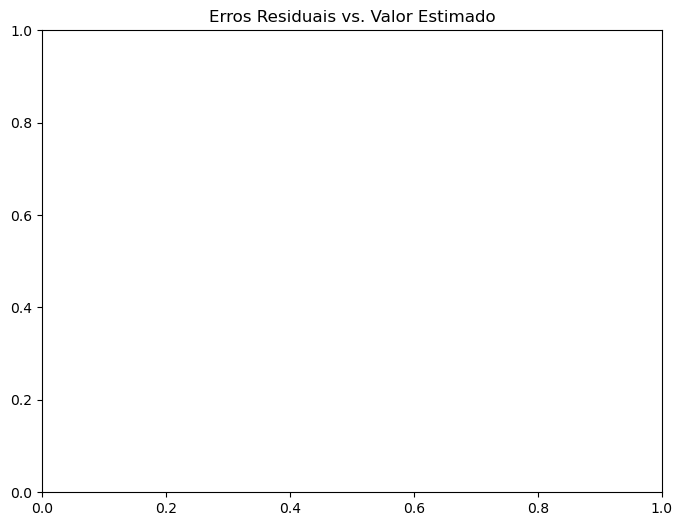

In [121]:
figura = plt.figure(figsize = (8, 6))

plt.title("Erros Residuais vs. Valor Estimado")
plt.scatter(X_nordeste_2004.iloc[2:, :], y_nordeste_2004)
plt.plot(X_nordeste_2004.iloc[2:, :], y_predict, c = "red")

plt.show()

### Dataset contendo somente a Bahia